![ViT](./media/img_demo.png)

# Visualize Vision Transformer Attention

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# import some libraries
import os
import torch
import numpy as np
from PIL import Image
from utils.vision_transformers import VitGenerator
from utils.preprocess import Loader, visualize_predict

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
if device.type == "cuda":
    torch.cuda.set_device(1)

# 1.0 Load the ViT Model

In [ ]:
# set some variables
name_model = 'vit_small'
patch_size = 8

In [ ]:
model = VitGenerator(name_model, patch_size,
                     device, evaluate=True, random=False, verbose=True)

[INFO] Initializing vit_small with patch size of 8
[INFO] Loading weights


# 2.0 Visualize Attention

## 2.1 Load an image

### 2.1.1 Use predefined path

In [ ]:
path = './media/test_1.jpg'

In [ ]:
img = Image.open(path)

### 2.1.2 Use the loader widget

If it doesn't work, execute the following passage:
- pip install ipywidgets (naturally in your terminal)
- jupyter nbextension enable --py widgetsnbextension 
- reload notebook

In [ ]:
loader = Loader()

In [ ]:
img = loader.getLastImage()

[INFO] Image Dimension (1186, 961)


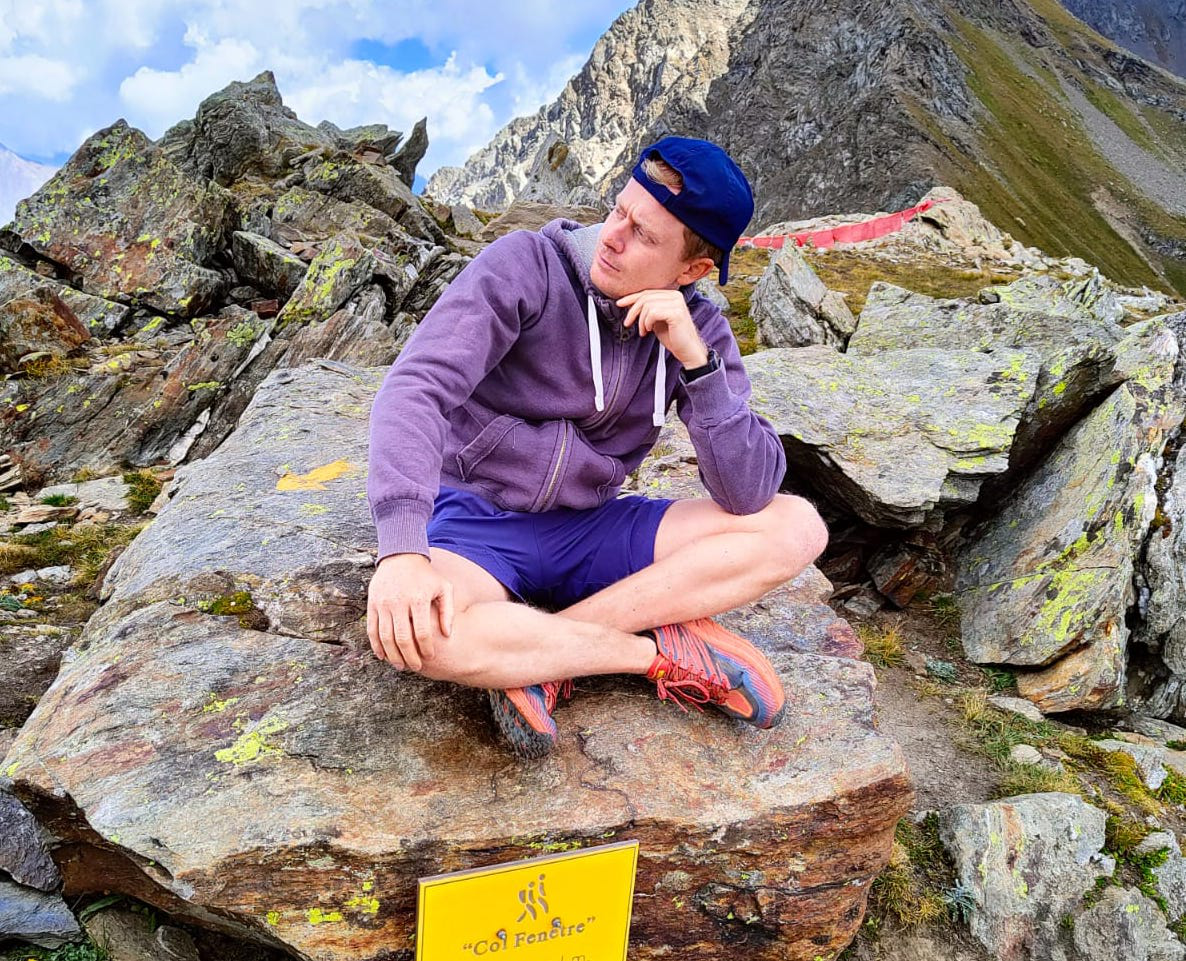

In [ ]:
print(f"[INFO] Image Dimension {img.size}")
img

## 2.2 Feed the network

In [ ]:
factor_reduce = 2
img_size = tuple(np.array(img.size[::-1]) // factor_reduce) # PIL works with col, row

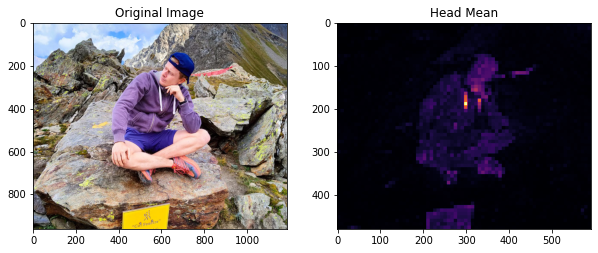

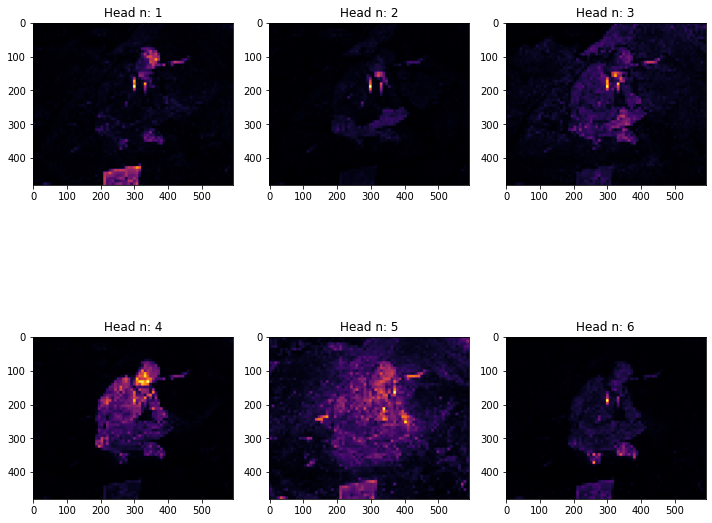

In [ ]:
visualize_predict(model, img, img_size, patch_size, device)